In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
Baseball = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
Baseball.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


checking the information of these data for my EDA

In [3]:
Baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [4]:
Baseball.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

In [5]:
Baseball.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<AxesSubplot:>

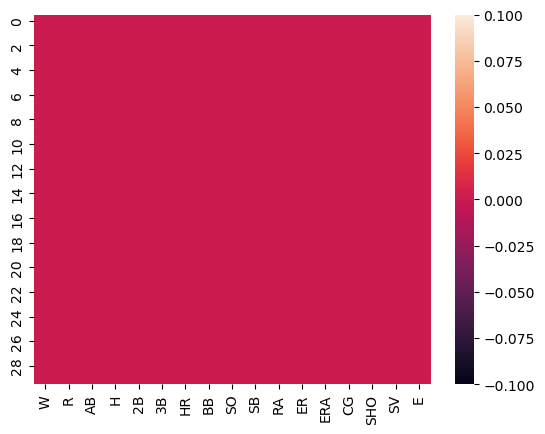

In [6]:
sns.heatmap(Baseball.isnull())

It is clearly seen tha there are no null values in the dataset and this dataset contains floats and integer data type

W is the label while other variables are the features

In [7]:
Baseball.shape

(30, 17)

In [8]:
Baseball.columns.tolist()

['W',
 'R',
 'AB',
 'H',
 '2B',
 '3B',
 'HR',
 'BB',
 'SO',
 'SB',
 'RA',
 'ER',
 'ERA',
 'CG',
 'SHO',
 'SV',
 'E']

In [9]:
Baseball.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [10]:
Baseball.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

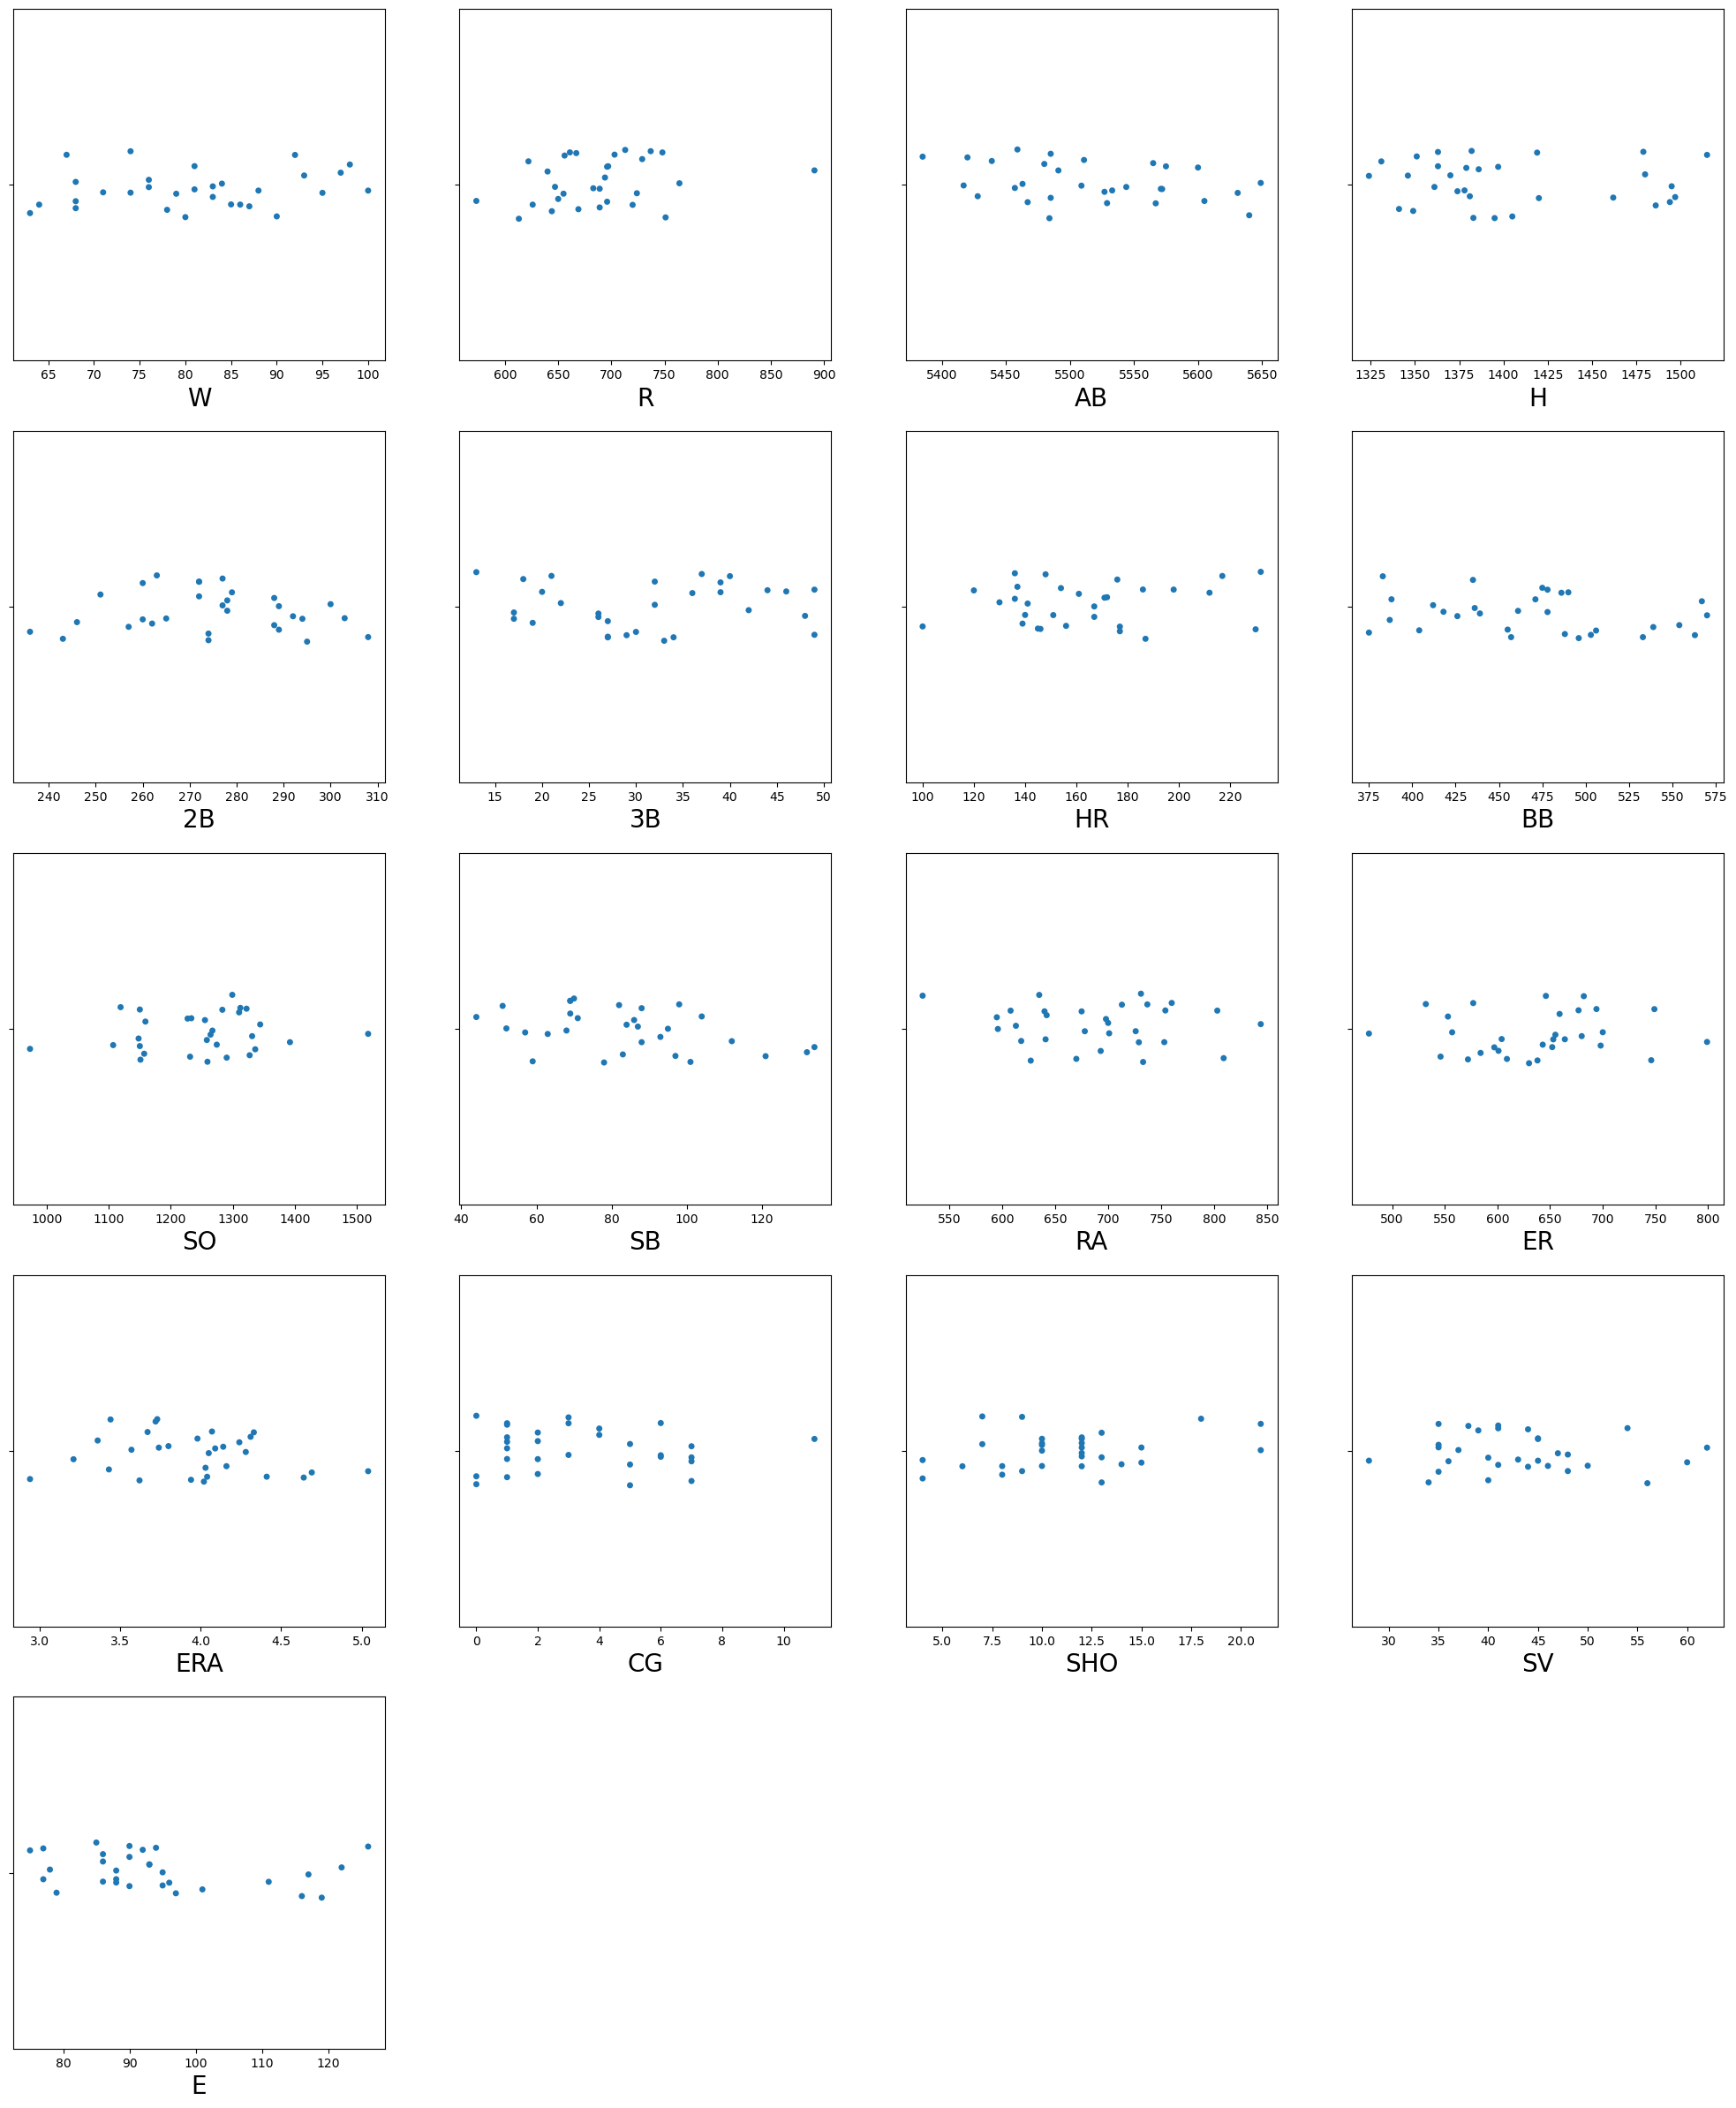

In [11]:
plt.figure(figsize=(25,30))
plotnumber = 1
for column in Baseball:
    if plotnumber<=17:
        ax = plt.subplot(5,4,plotnumber)
        sns.stripplot(Baseball[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.show()

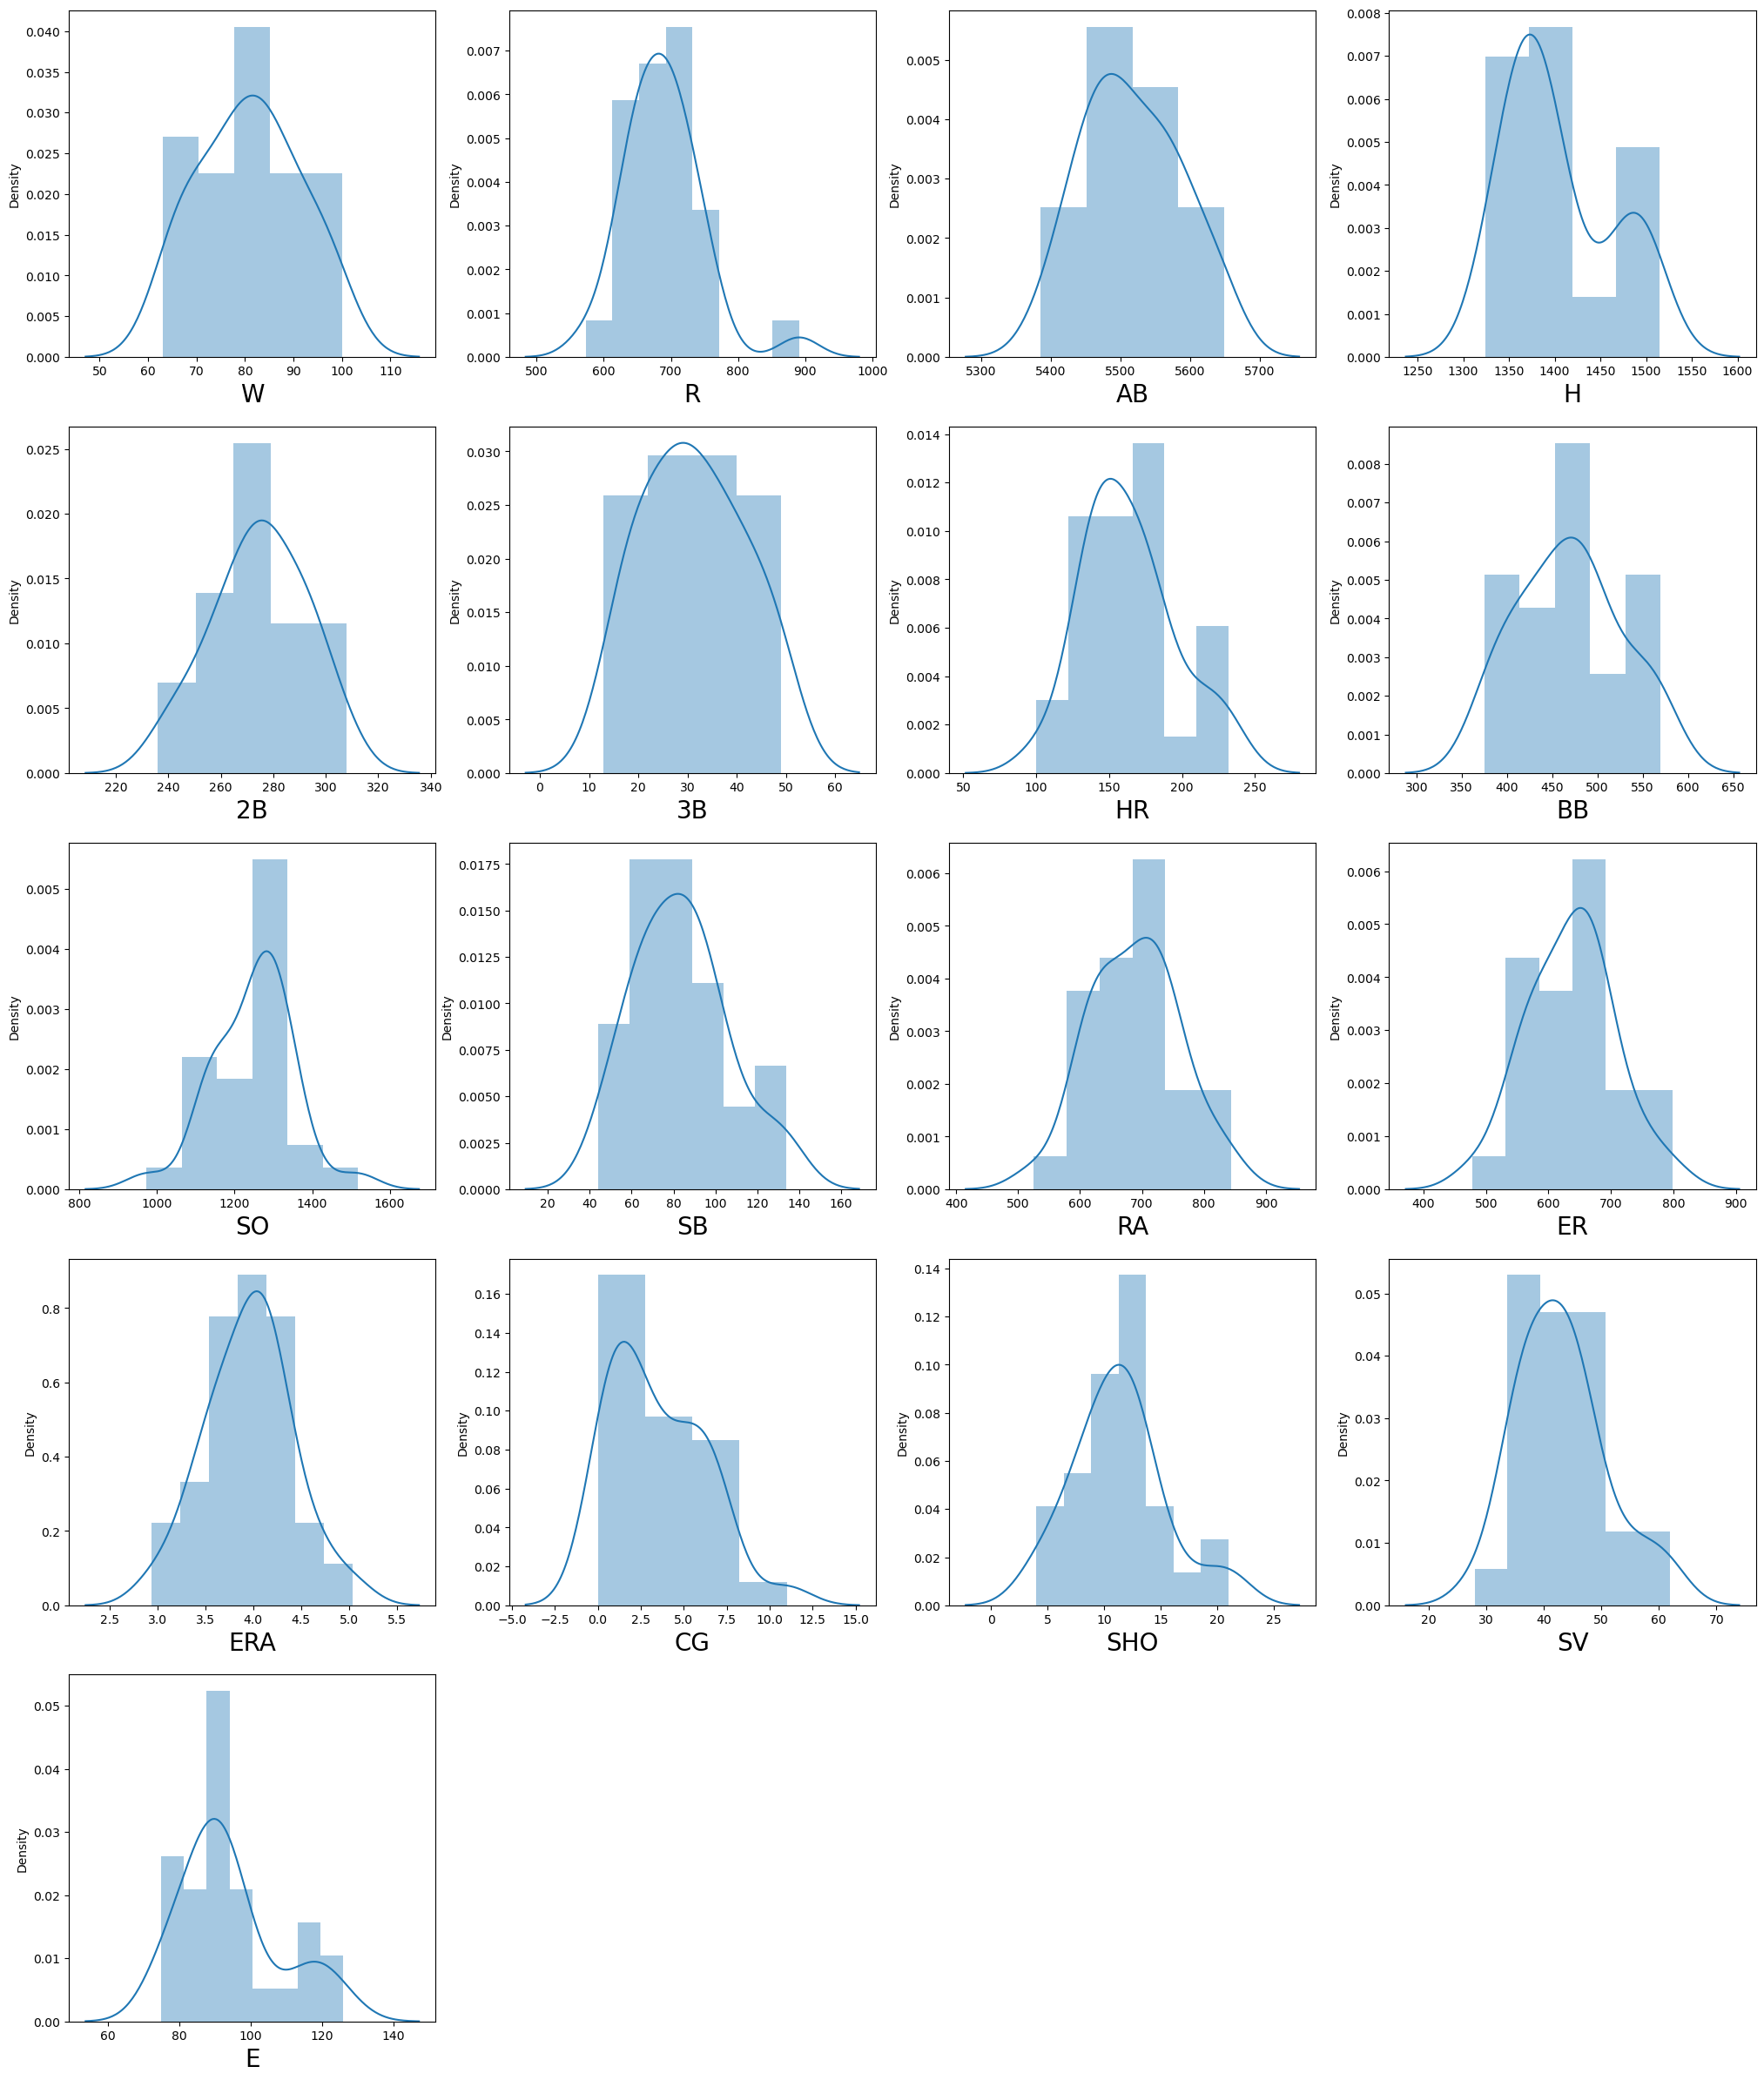

In [12]:
plt.figure(figsize=(25,30))
plotnumber = 1
for column in Baseball:
    if plotnumber<=17:
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(Baseball[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.show()

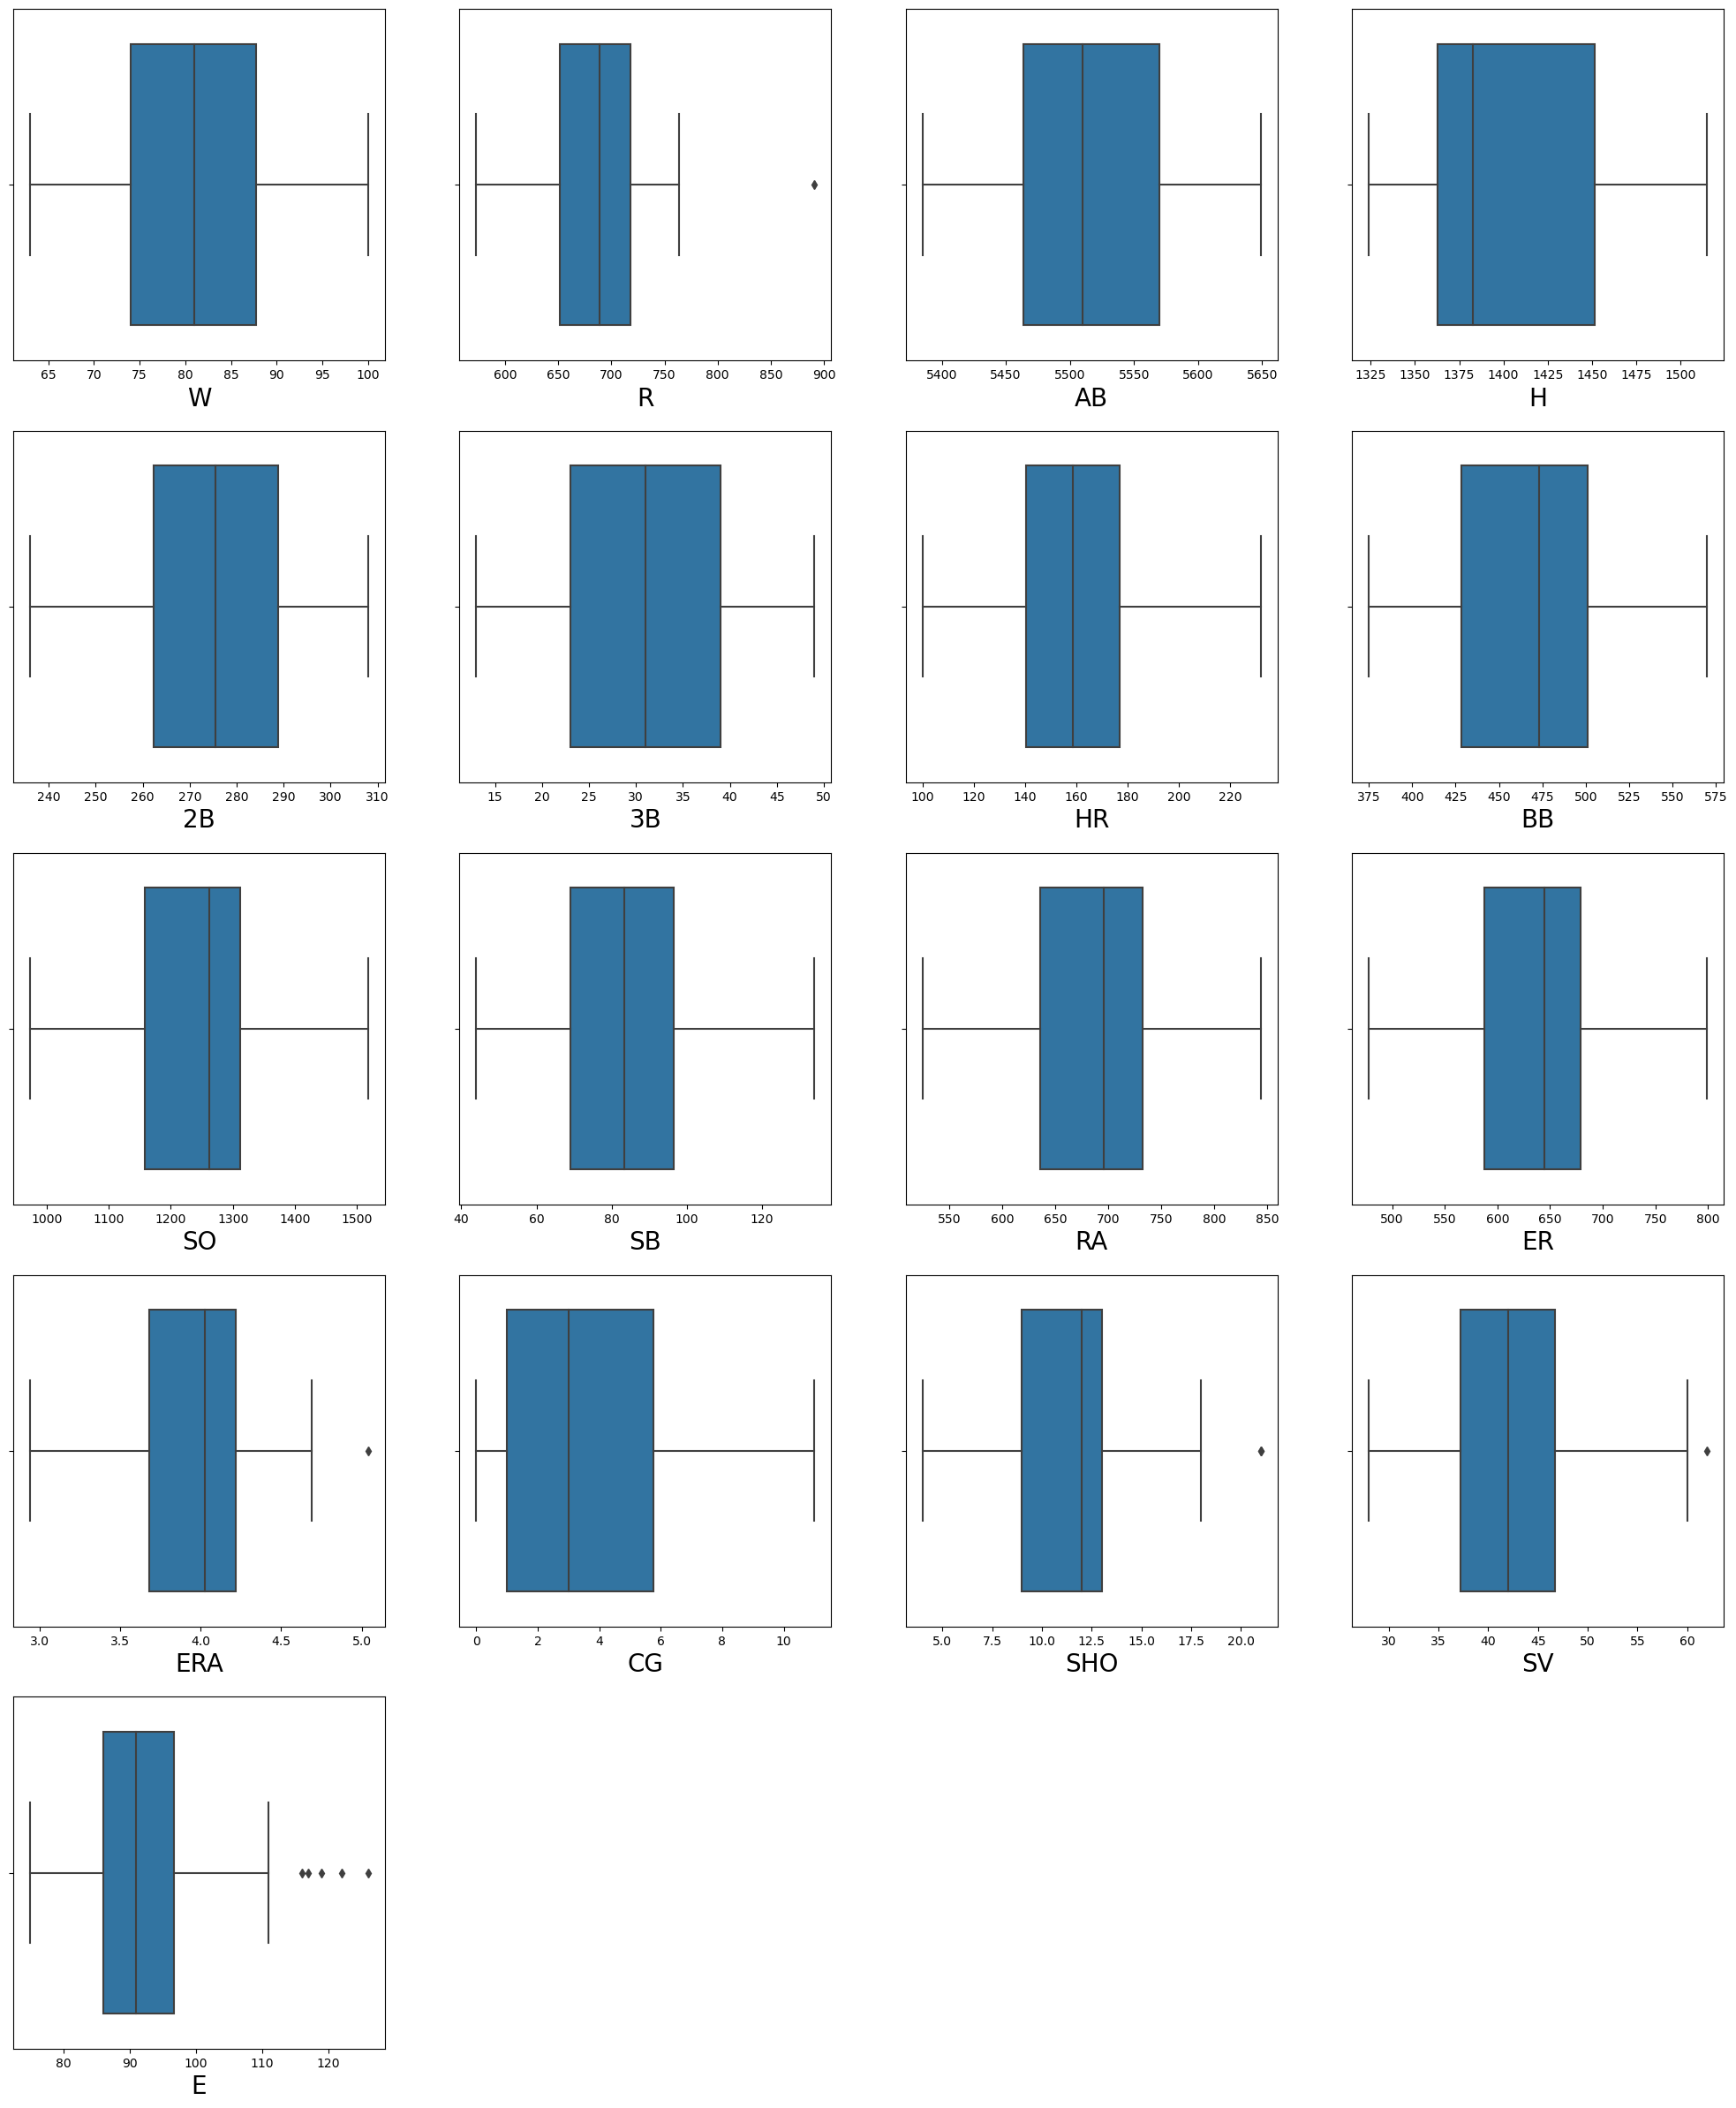

In [13]:
plt.figure(figsize=(25,30))
plotnumber = 1
for column in Baseball:
    if plotnumber<=17:
        ax = plt.subplot(5,4,plotnumber)
        sns.boxplot(Baseball[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.show()

from above i can see that the data is has a normal distribution but few ouliers on 'E','SV','SHO','ERA', and 'R'

removing the outliers

In [14]:
q1 =Baseball.quantile(0.25)
q3 = Baseball.quantile(0.75)
iqr = q3-q1

In [15]:
q1

W        74.0000
R       651.2500
AB     5464.0000
H      1363.0000
2B      262.2500
3B       23.0000
HR      140.2500
BB      428.2500
SO     1157.5000
SB       69.0000
RA      636.2500
ER      587.2500
ERA       3.6825
CG        1.0000
SHO       9.0000
SV       37.2500
E        86.0000
Name: 0.25, dtype: float64

In [16]:
R_high =(q3['R'] + (1.5*iqr['R']))
R_high

818.75

In [17]:
np_index = np.where(Baseball['R']>R_high)
np_index

(array([5], dtype=int64),)

In [18]:
Baseball = Baseball.drop(Baseball.index[np_index])
Baseball.shape

(29, 17)

In [19]:
Baseball.reset_index()

,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [20]:
ERA_high =(q3['ERA'] + (1.5*iqr['ERA']))
print(ERA_high)
np_index = np.where(Baseball['ERA']>ERA_high)
print(np_index)
Baseball = Baseball.drop(Baseball.index[np_index])
Baseball.shape
Baseball.reset_index()

5.026250000000001
(array([28], dtype=int64),)


,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [21]:
SHO_high =(q3['SHO'] + (1.5*iqr['SHO']))
print(SHO_high)
np_index = np.where(Baseball['SHO']>SHO_high)
print(np_index)
Baseball = Baseball.drop(Baseball.index[np_index])
Baseball.shape
Baseball.reset_index()

19.0
(array([16, 24], dtype=int64),)


,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [22]:
SV_high =(q3['SV'] + (1.5*iqr['SV']))
print(SV_high)
np_index = np.where(Baseball['SV']>SV_high)
print(np_index)
Baseball = Baseball.drop(Baseball.index[np_index])
Baseball.shape
Baseball.reset_index()

61.0
(array([14], dtype=int64),)


,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [23]:
E_high =(q3['E'] + (1.5*iqr['E']))
print(E_high)
np_index = np.where(Baseball['E']>E_high)
print(np_index)
Baseball = Baseball.drop(Baseball.index[np_index])
Baseball.shape
Baseball.reset_index()

112.875
(array([ 9, 13, 14, 15, 21], dtype=int64),)


,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,11,86,729,5459,1363,278,26,230,486,1392,121,618,572,3.57,5,13,39,85


In [24]:
Baseball.skew()

W     -0.194773
R     -0.316726
AB     0.345887
H      0.817990
2B    -0.149289
3B     0.268007
HR     0.360341
BB     0.079234
SO    -0.791526
SB     0.639024
RA     0.304559
ER     0.213161
ERA    0.218418
CG     1.082534
SHO   -0.135227
SV     1.043927
E     -0.243990
dtype: float64

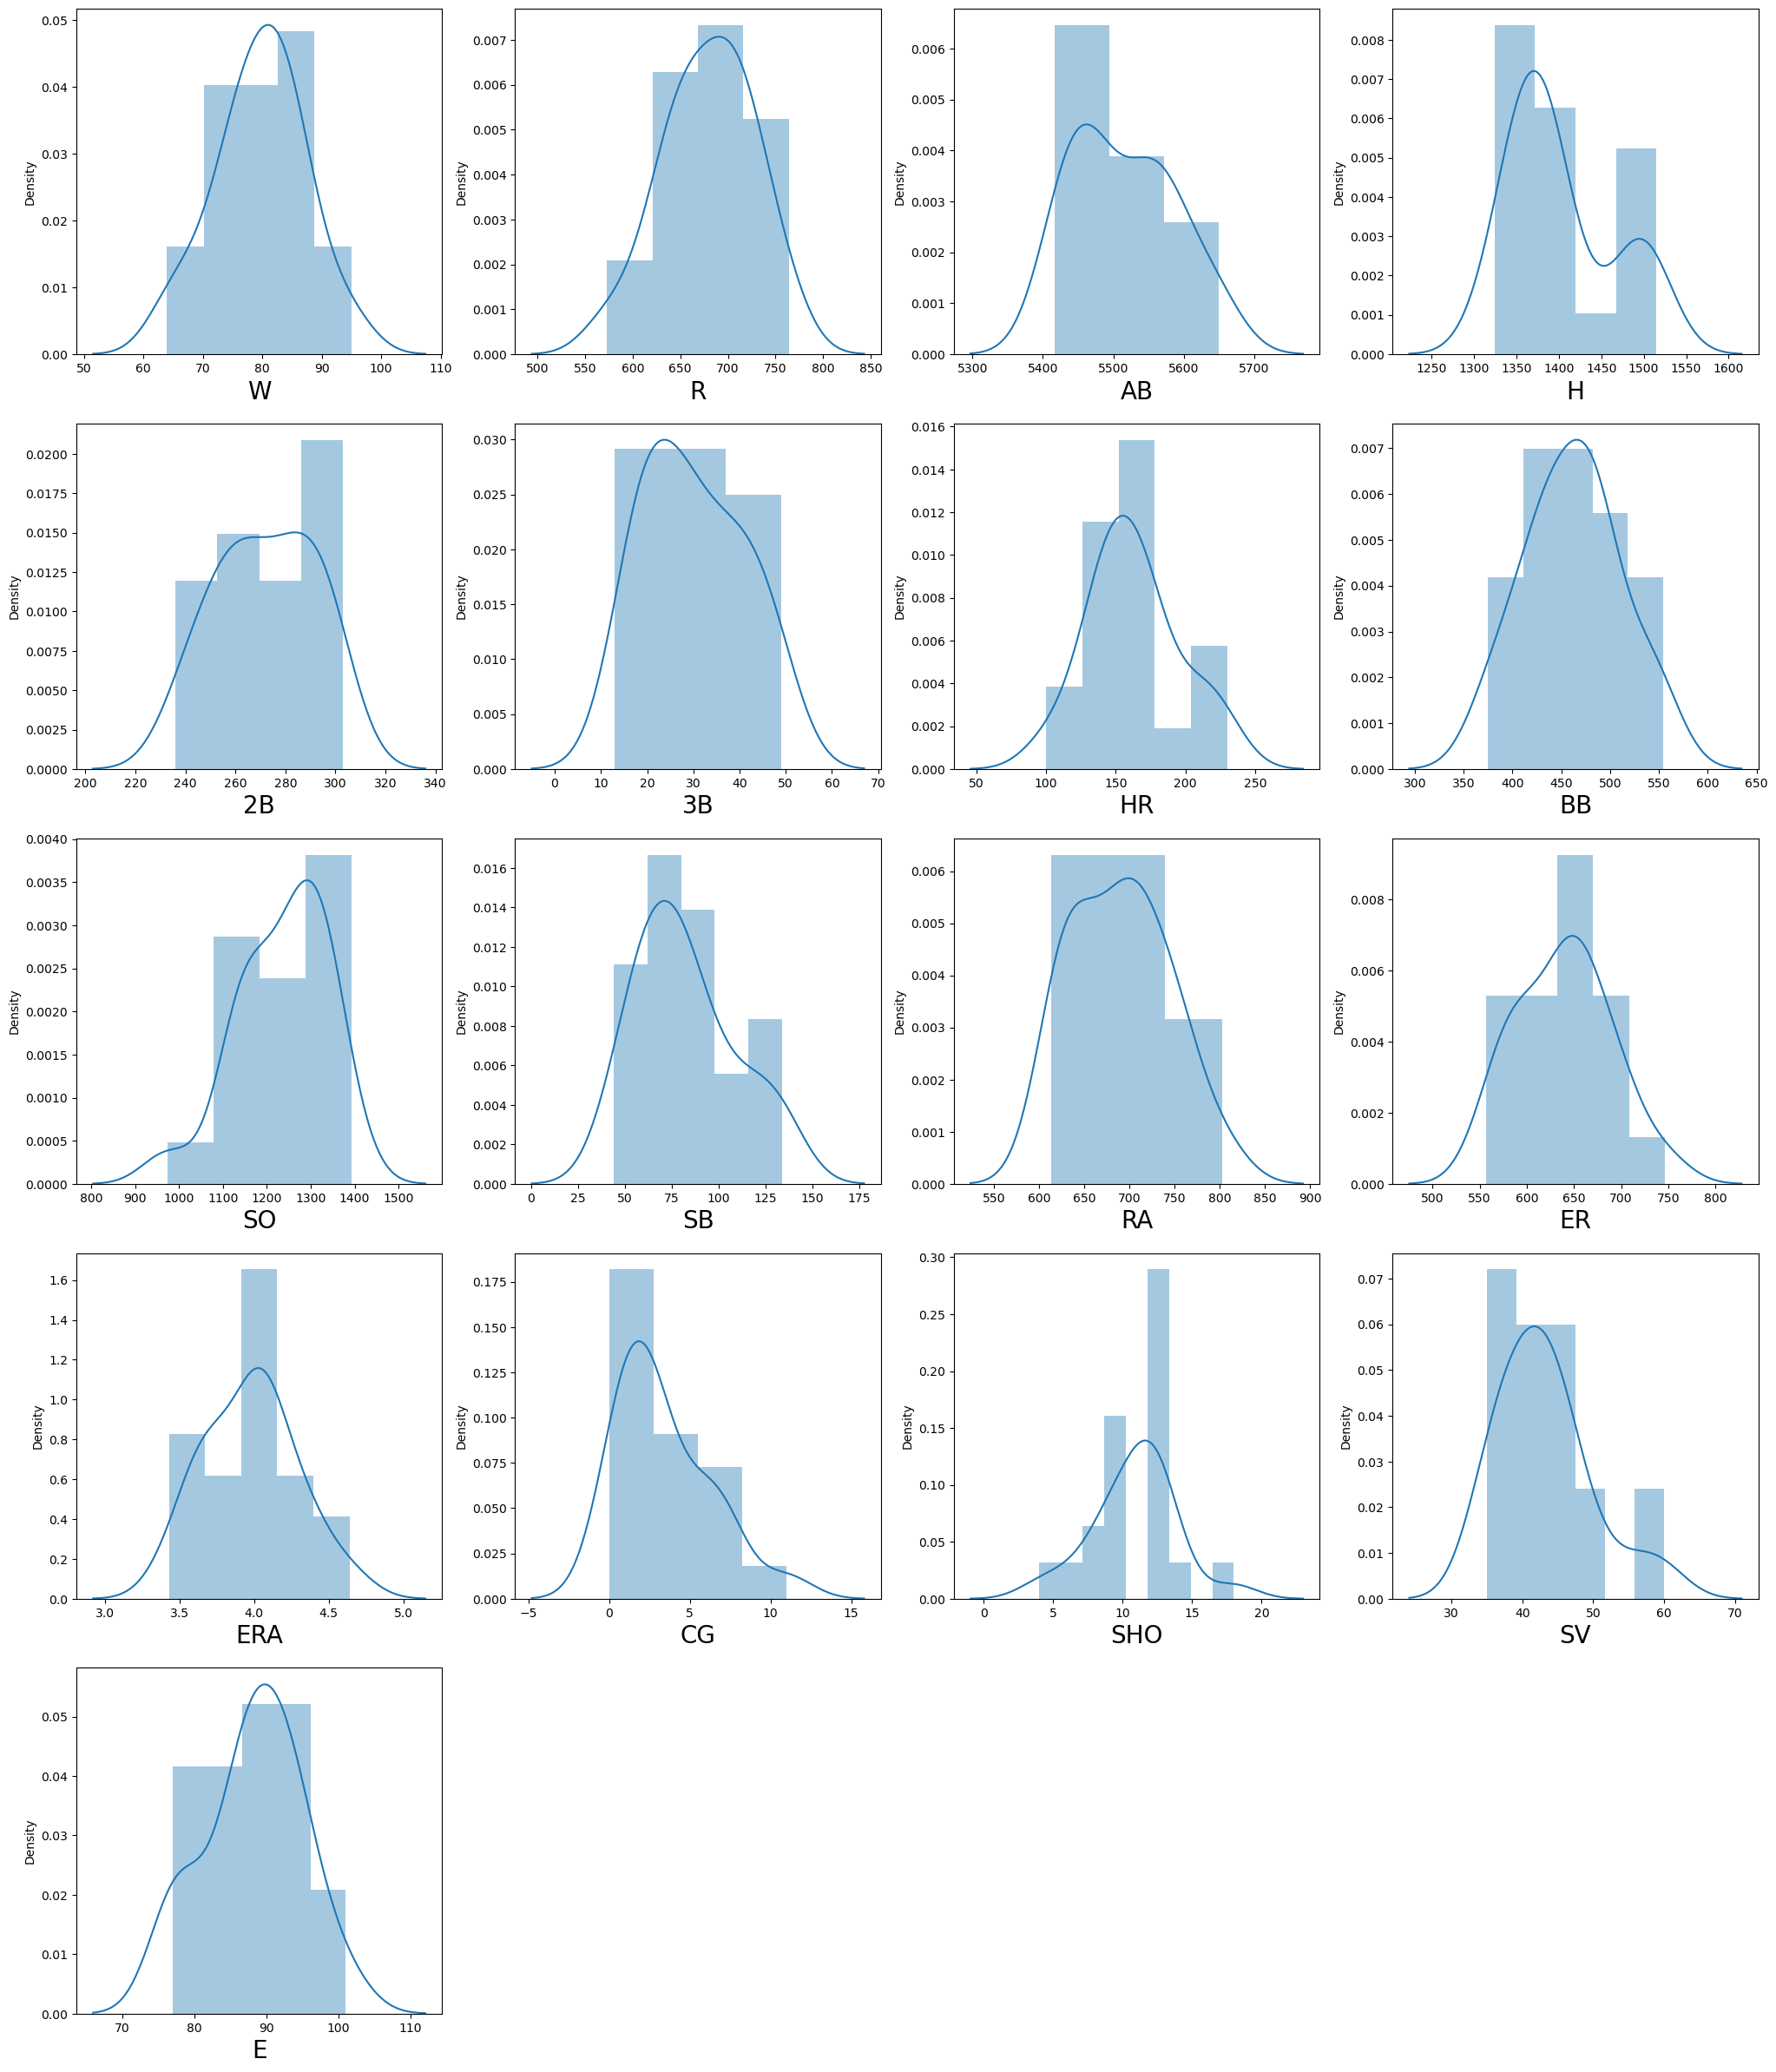

In [25]:
plt.figure(figsize=(25,30))
plotnumber = 1
for column in Baseball:
    if plotnumber<=17:
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(Baseball[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.show()

the outliers has been removed.

In [26]:
Baseball.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.664613,0.027707,0.078970,0.501117,-0.060975,0.386591,0.054778,-0.112958,-0.259240,-0.707841,-0.684375,-0.707450,0.000958,0.157447,0.572890,-0.082535
R,0.664613,1.000000,0.469861,0.385690,0.535319,0.114559,0.594316,0.351671,0.121402,-0.025584,-0.212049,-0.187813,-0.227161,-0.007971,-0.048655,0.169558,-0.088541
AB,0.027707,0.469861,1.000000,0.781273,0.494489,0.464465,0.027794,0.069801,-0.091785,0.330095,0.348298,0.393995,0.317000,0.018335,-0.061948,-0.013010,0.163275
H,0.078970,0.385690,0.781273,1.000000,0.545859,0.651514,-0.278711,-0.084576,-0.406969,0.401832,0.203982,0.277340,0.249744,0.198161,0.161967,-0.073774,-0.181437
2B,0.501117,0.535319,0.494489,0.545859,1.000000,0.367722,-0.031140,0.315531,-0.148303,0.176088,-0.239770,-0.250479,-0.293325,0.393197,0.164514,0.249403,-0.042630
3B,-0.060975,0.114559,0.464465,0.651514,0.367722,1.000000,-0.419930,-0.427679,-0.213592,0.557762,0.242080,0.295701,0.278939,0.003651,0.119039,-0.101118,-0.257193
HR,0.386591,0.594316,0.027794,-0.278711,-0.031140,-0.419930,1.000000,0.364324,0.624167,-0.189567,-0.225423,-0.213640,-0.250566,-0.107611,-0.066284,0.143601,0.055023
BB,0.054778,0.351671,0.069801,-0.084576,0.315531,-0.427679,0.364324,1.000000,0.313191,-0.063280,-0.042415,-0.093157,-0.113309,0.356094,-0.051977,-0.101424,0.081413
SO,-0.112958,0.121402,-0.091785,-0.406969,-0.148303,-0.213592,0.624167,0.313191,1.000000,-0.046822,-0.020129,-0.071031,-0.102361,-0.081832,0.141591,-0.131985,0.061607
SB,-0.259240,-0.025584,0.330095,0.401832,0.176088,0.557762,-0.189567,-0.063280,-0.046822,1.000000,0.029920,0.068020,0.046978,-0.014465,0.027137,-0.220894,-0.235427


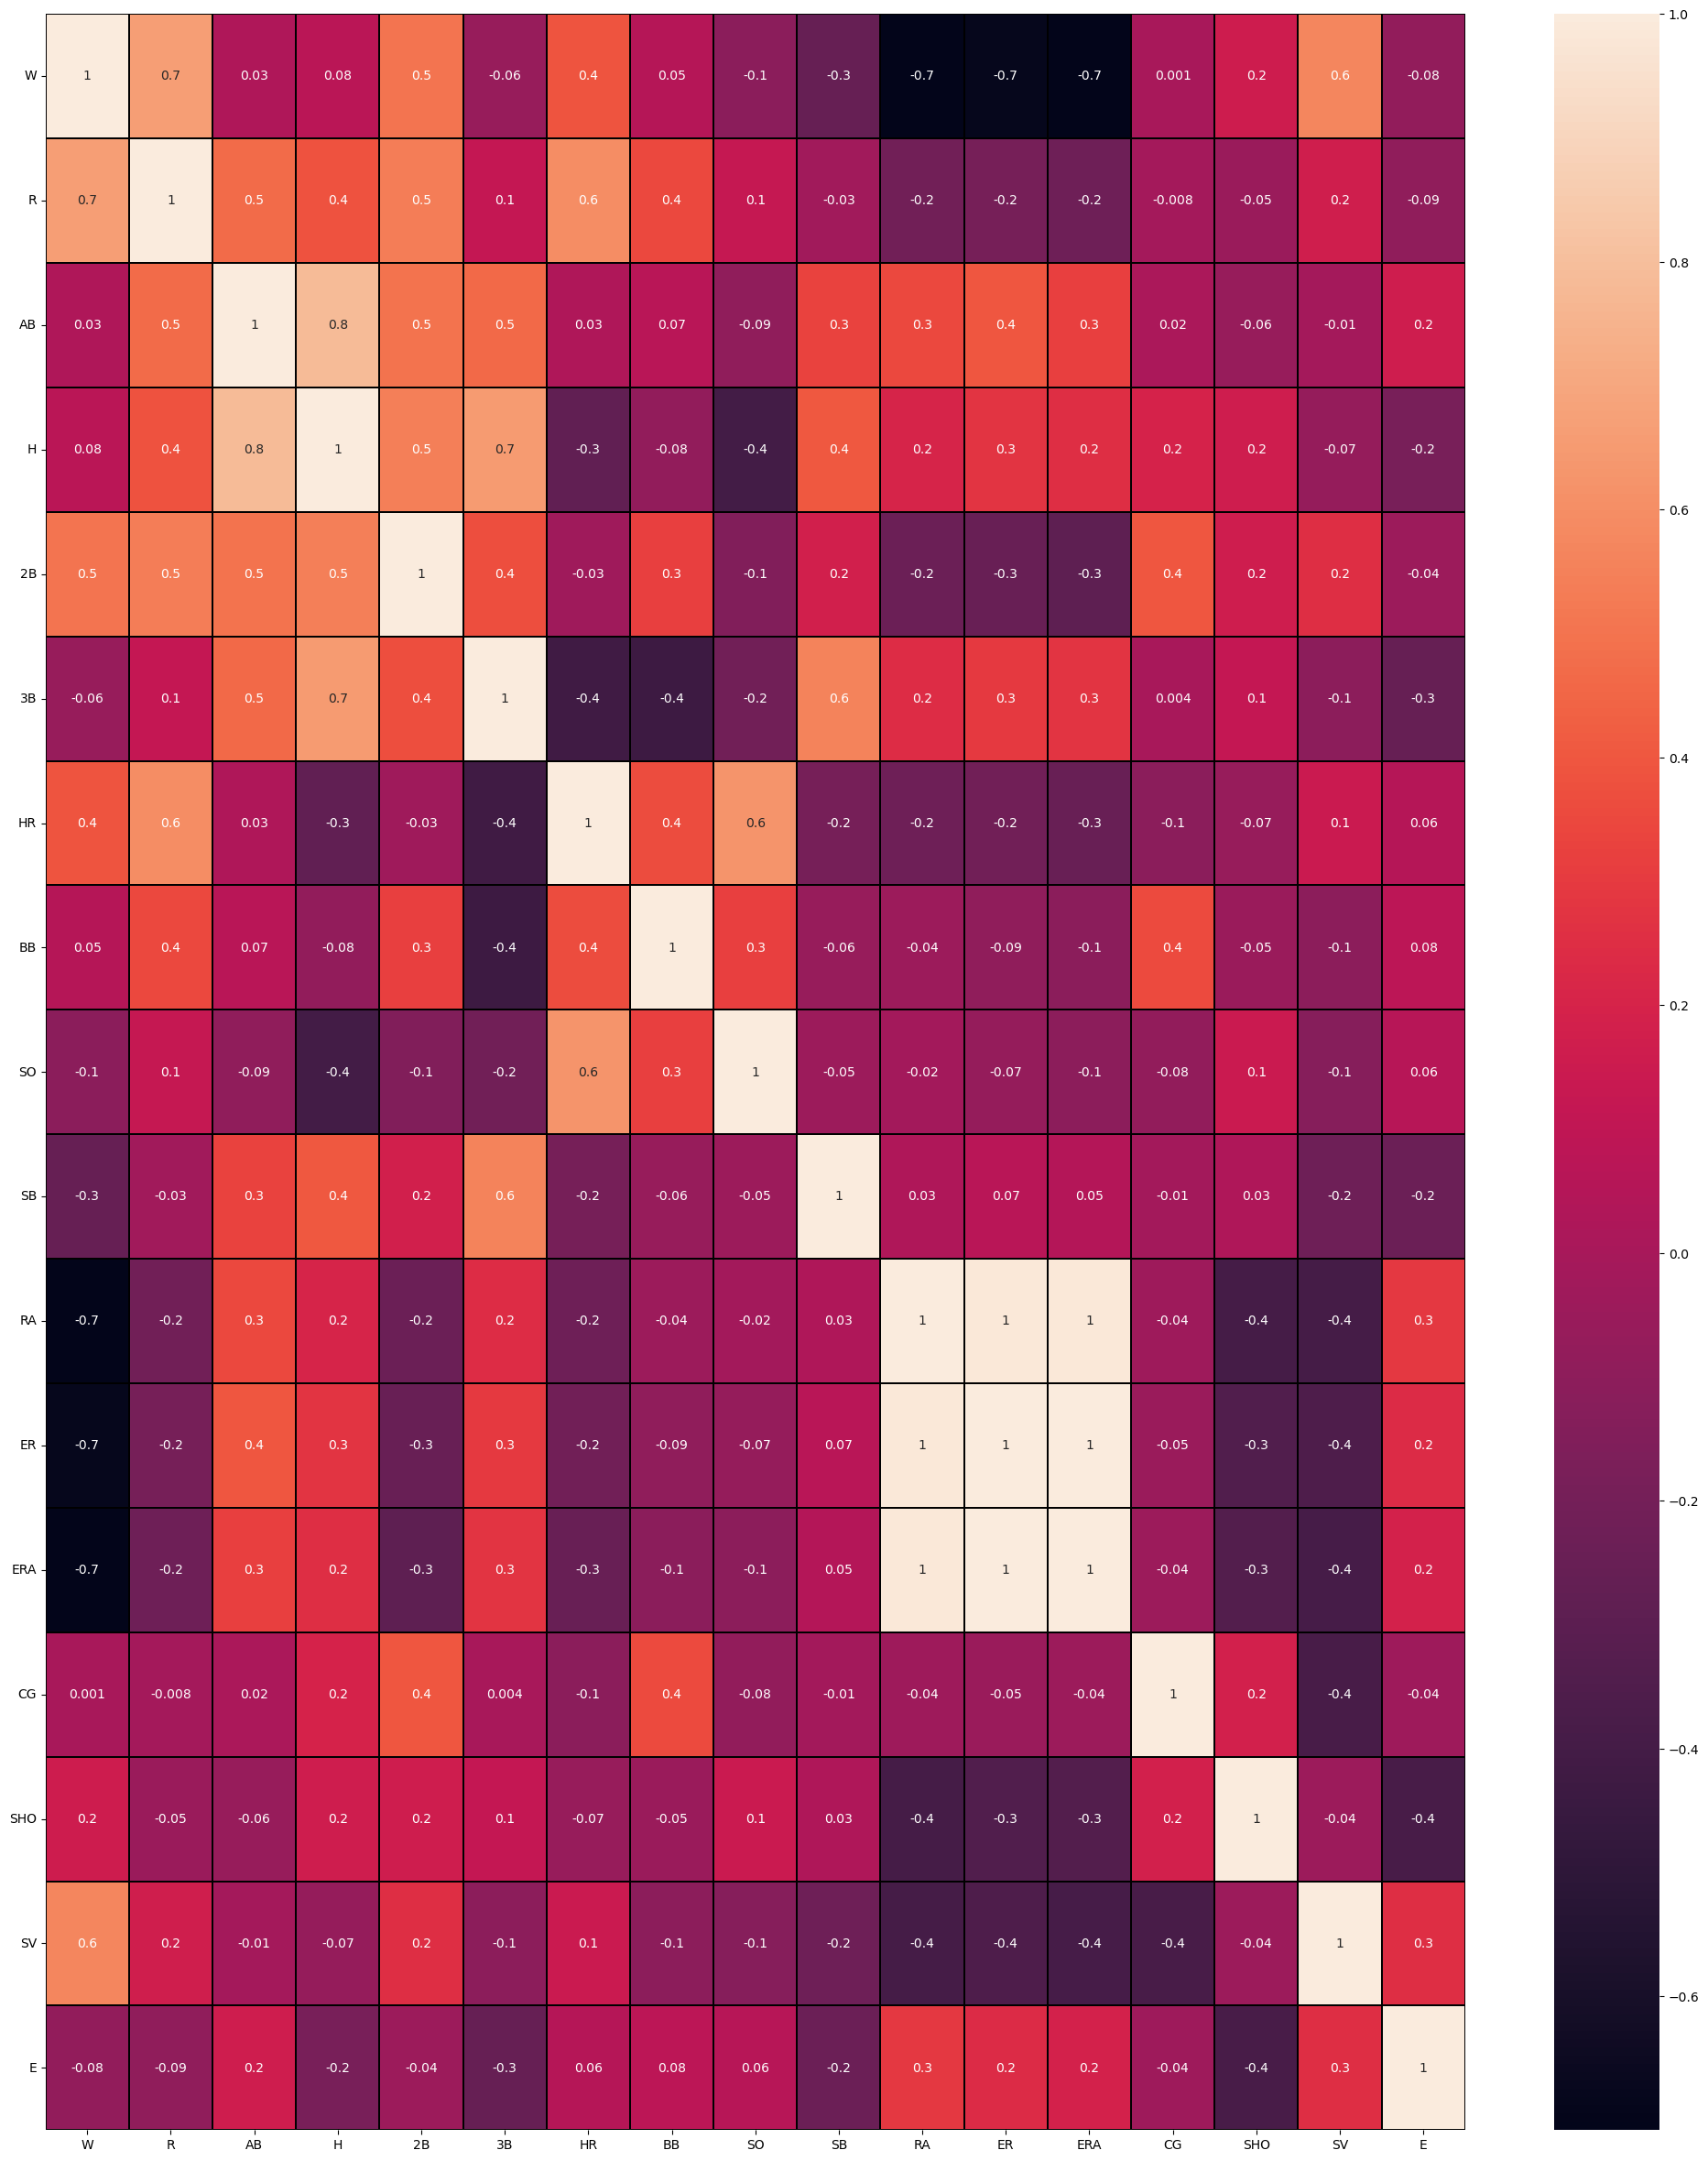

In [27]:
plt.figure(figsize=(25,30))
sns.heatmap(Baseball.corr(), linewidths = 0.1,fmt = '.1g',linecolor = 'Black', annot =True, )
plt.yticks(rotation = 0);
plt.show()

There is a case of multiculinearity because i can see that 'ERA', 'ER' and 'RA' are corrolated. i will now separate my label from the features. 

In [28]:
Features = Baseball.drop(columns = ['W'])
Label = Baseball['W']

In [29]:
scaler = StandardScaler()
Features = pd.DataFrame(scaler.fit_transform(Features),columns = Features.columns)
Features

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.945647,0.850459,1.604901,1.428247,1.120003,-0.755009,-1.654922,-2.632515,0.835767,-0.933524,-0.788633,-0.824411,-0.493742,-0.970292,1.982149,-0.038219
1,0.348621,-0.675281,-0.890113,0.248725,1.308239,-0.223533,-0.482555,0.279161,-0.479792,0.189369,0.286306,0.308113,-0.493742,0.391521,0.285368,-0.343973
2,-0.227083,-1.070844,-0.114636,1.582098,-0.103530,-0.692483,1.485348,-0.791456,0.139294,-0.952556,-1.140055,-1.024268,2.680313,-0.289385,-0.794402,-1.414110
3,-1.229234,0.257115,-0.350651,-0.623095,-0.291766,-0.848799,-1.215284,-0.051029,-0.557178,0.208401,0.079587,0.008327,1.269622,-0.629839,-0.948655,1.949179
4,0.199364,1.274276,1.908349,0.864128,1.778828,-0.379849,-0.147593,0.229132,0.023216,2.149675,2.208792,2.206755,1.269622,0.391521,-1.257161,-0.343973
5,1.798541,0.737441,-0.080919,-0.007693,-1.044709,1.527213,1.924985,-0.091052,-0.750642,0.151305,0.265634,0.174875,-0.141069,-2.332105,0.748126,0.726165
6,0.711101,-0.420991,-0.536091,-1.341065,-0.950591,1.683530,-0.922193,0.949547,-1.485807,0.056145,0.141602,0.241494,-1.199088,-0.289385,-0.023138,-1.719864
7,-0.760142,-0.420991,-0.316934,0.300009,0.178824,0.120364,-0.545360,0.739426,0.177987,-0.914492,-0.726617,-0.791101,-0.846415,0.391521,2.599161,1.031918
8,1.457383,1.768729,1.571185,1.120546,0.272942,-0.067216,0.333915,-0.881507,-0.441099,1.198071,1.133853,1.107541,-0.141069,-0.289385,-0.485897,1.337672
9,1.052259,-0.788299,-0.654098,0.300009,-0.385883,2.089953,0.501396,1.559898,1.493546,-1.371263,-1.388118,-1.357363,0.564276,0.731975,-0.640149,-0.496850


In [30]:
vif = pd.DataFrame()
vif['vif values']= [variance_inflation_factor(Features.values, i) for i in range(len(Features.columns))]
vif['features'] = Features.columns

In [31]:
vif

,vif values,features
0,39.708041,R
1,141.142572,AB
2,32.875135,H
3,32.689242,2B
4,59.652461,3B
5,51.352184,HR
6,17.624292,BB
7,14.135117,SO
8,6.202011,SB
9,385.454748,RA


because the column 'ER' has the highest vif so i will drop this column

In [32]:
Features.drop(['ER'],axis = 1, inplace = True)

In [33]:
vif = pd.DataFrame()
vif['vif values']= [variance_inflation_factor(Features.values, i) for i in range(len(Features.columns))]
vif['features'] = Features.columns

In [34]:
vif

,vif values,features
0,21.112150,R
1,7.563363,AB
2,14.307224,H
3,10.535330,2B
4,14.635053,3B
5,19.688258,HR
6,6.980021,BB
7,7.857921,SO
8,5.657417,SB
9,161.741414,RA


In [35]:
Features.drop(['ERA'],axis = 1, inplace = True)

In [36]:
vif = pd.DataFrame()
vif['vif values']= [variance_inflation_factor(Features.values, i) for i in range(len(Features.columns))]
vif['features'] = Features.columns

In [37]:
vif

,vif values,features
0,21.043430,R
1,7.023196,AB
2,13.202736,H
3,6.204815,2B
4,13.297809,3B
5,17.361611,HR
6,6.745146,BB
7,5.026823,SO
8,5.657202,SB
9,7.255143,RA


In [38]:
Features.drop(['R'],axis = 1, inplace = True)

In [39]:
vif = pd.DataFrame()
vif['vif values']= [variance_inflation_factor(Features.values, i) for i in range(len(Features.columns))]
vif['features'] = Features.columns

In [40]:
vif

,vif values,features
0,6.691264,AB
1,8.089153,H
2,5.197902,2B
3,6.003008,3B
4,3.052524,HR
5,3.288018,BB
6,3.555605,SO
7,2.117940,SB
8,3.640260,RA
9,2.589490,CG


as we can see from the vif values above after dropping some highest vif columns the issue of multiculinearity was solved.

Now straight to the building of my label since I now have a clean data

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold,cross_val_score
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor as DT
from sklearn.ensemble import RandomForestRegressor

In [43]:
MaxAccu = 0
MaxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(Features,Label,test_size = .30, random_state = i)
    Lr = LinearRegression()
    Lr.fit(x_train,y_train)
    pred = Lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>MaxAccu:
        MaxAccu = acc
        MaxRS = i
print('maximum r2 score is =',MaxAccu,'\n random state = ',MaxRS)

maximum r2 score is = 0.6138100159073313 
 random state =  34


In [44]:
x_train,x_test,y_train,y_test = train_test_split(Features,Label, test_size = 0.30, random_state = MaxRS)

In [45]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr = rfr.predict(x_test)
pred_train = rfr.predict(x_train)
print ('R2 score:', r2_score(y_test,pred_rfr))
print ('R2 score on training Data:',r2_score(y_train,pred_train)*100)
print ('Mean absolute Error:', mean_absolute_error(y_test,pred_rfr))
print ('Mean squared Error:', mean_squared_error(y_test,pred_rfr))
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,pred_rfr)))

R2 score: 0.2750201804757997
R2 score on training Data: 88.61039602469509
Mean absolute Error: 7.599999999999999
Mean squared Error: 73.64586666666668
Root mean squared Error: 8.58171699991713


In [46]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred_lr = lr.predict(x_test)
pred_train = lr.predict(x_train)
print ('R2 score:', r2_score(y_test,pred_lr))
print ('R2 score on training Data:',r2_score(y_train,pred_train)*100)
print ('Mean absolute Error:', mean_absolute_error(y_test,pred_lr))
print ('Mean squared Error:', mean_squared_error(y_test,pred_lr))
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,pred_lr)))

R2 score: 0.6138100159073313
R2 score on training Data: 100.0
Mean absolute Error: 5.30650512404959
Mean squared Error: 39.23046588408026
Root mean squared Error: 6.263422856879476


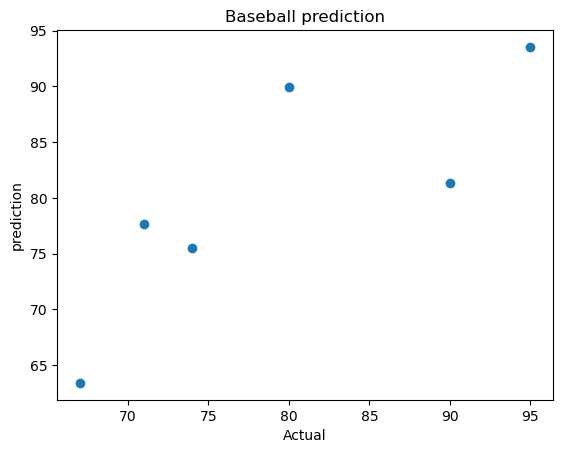

In [47]:
plt.scatter(y_test,pred_lr)
plt.xlabel('Actual')
plt.ylabel('prediction')
plt.title('Baseball prediction')
plt.show()

In [48]:
lasso = Lasso()
lasso.fit(x_train,y_train)
pred_lasso = lasso.predict(x_test)
pred_train = lasso.predict(x_train)
print ('R2 score:', r2_score(y_test,pred_lasso))
print ('R2 score on training Data:',r2_score(y_train,pred_train)*100)
print ('Mean absolute Error:', mean_absolute_error(y_test,pred_lasso))
print ('Mean squared Error:', mean_squared_error(y_test,pred_lasso))
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2 score: 0.4738189372798476
R2 score on training Data: 65.22672562391092
Mean absolute Error: 6.7694230947346155
Mean squared Error: 53.45122628798882
Root mean squared Error: 7.311034556612957


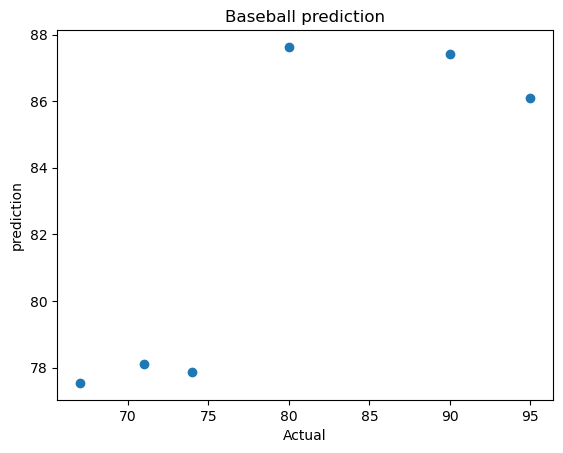

In [49]:
plt.scatter(y_test,pred_lasso)
plt.xlabel('Actual')
plt.ylabel('prediction')
plt.title('Baseball prediction')
plt.show()

In [50]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
pred_train = knn.predict(x_train)
print ('R2 score:', r2_score(y_test,pred_knn))
print ('R2 score on training Data:',r2_score(y_train,pred_train)*100)
print ('Mean absolute Error:', mean_absolute_error(y_test,pred_knn))
print ('Mean squared Error:', mean_squared_error(y_test,pred_knn))
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 score: 0.2437079573420834
R2 score on training Data: 20.397530492395745
Mean absolute Error: 7.666666666666667
Mean squared Error: 76.8266666666667
Root mean squared Error: 8.765082239583762


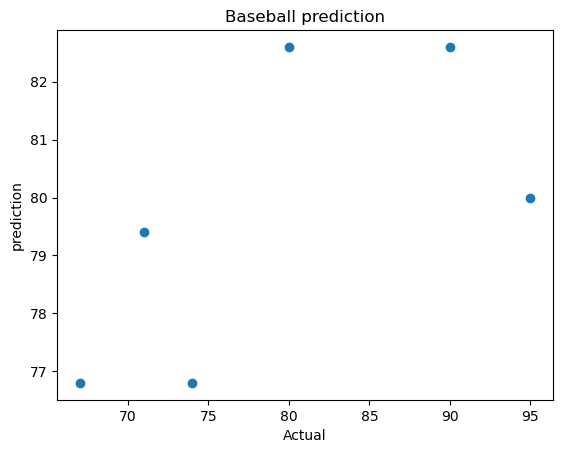

In [51]:
plt.scatter(y_test,pred_knn)
plt.xlabel('Actual')
plt.ylabel('prediction')
plt.title('Baseball prediction')
plt.show()

In [52]:
dt = DT()
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)
pred_train = dt.predict(x_train)
print ('R2 score:', r2_score(y_test,pred_dt))
print ('R2 score on training Data:',r2_score(y_train,pred_train)*100)
print ('Mean absolute Error:', mean_absolute_error(y_test,pred_dt))
print ('Mean squared Error:', mean_squared_error(y_test,pred_dt))
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,pred_dt)))

R2 score: 0.1337161607875308
R2 score on training Data: 100.0
Mean absolute Error: 8.666666666666666
Mean squared Error: 88.0
Root mean squared Error: 9.38083151964686


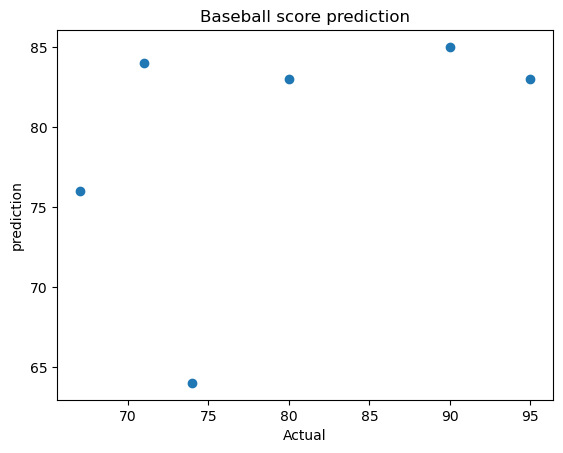

In [53]:
plt.scatter(y_test,pred_dt)
plt.xlabel('Actual')
plt.ylabel('prediction')
plt.title('Baseball score prediction')
plt.show()

In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
score1 = cross_val_score(rfr,Features,Label,cv=5,scoring='r2')
print(score1)
print(score1.mean())
print('difference =',(r2_score(y_test,pred_rfr)-score1.mean()))

[ 0.01202054 -0.10076824  0.47828629  0.12264146 -0.23482595]
0.05547082110632138
difference = 0.2195493593694783


In [56]:
score2 = cross_val_score(lr,Features,Label,cv=5,scoring='r2')
print(score2)
print(score2.mean())
print('difference =',(r2_score(y_test,pred_lr)-score2.mean()))

[-1.61450999 -3.56277021 -2.57863263 -0.43312698 -0.37869753]
-1.713547467617842
difference = 2.3273574835251734


In [57]:
score3 = cross_val_score(lasso,Features,Label,cv=5,scoring='r2')
print(score3)
print(score3.mean())
print('difference =',(r2_score(y_test,pred_lasso)-score3.mean()))

[ 0.00987362 -1.61395387  0.21771004  0.33146922  0.48444307]
-0.11409158244524312
difference = 0.5879105197250907


In [58]:
score = cross_val_score(knn,Features,Label,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference =',(r2_score(y_test,pred_knn)-score.mean()))

[-0.47573813 -0.10117647 -1.05003344  0.3142439   0.00202532]
-0.26213576446237513
difference = 0.5058437218044585


In [59]:
score4 = cross_val_score(dt,Features,Label,cv=5,scoring='r2')
print(score4)
print(score4.mean())
print('difference =',(r2_score(y_test,pred_dt)-score4.mean()))

[ 0.27599487 -3.2        -2.19732441  0.29268293 -1.5443038 ]
-1.274590084028599
difference = 1.4083062448161299


I choose knn model since it has the lowest difference of r2 score validation. 

Now i will do the tunning in other to get the best model

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
params_grid = {'metric':['euclidean','minkowski','manhatta'],
             'weights': [ 'uniform','distance'],
             'n_neighbors':[3,5,7,9,11,13]
             }

In [62]:
grid_search =GridSearchCV(estimator=knn, param_grid = params_grid, cv = 5)

In [63]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'minkowski', 'manhatta'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13],
                         'weights': ['uniform', 'distance']})

In [64]:
my_best_parameter = grid_search.best_params_
print(my_best_parameter)

{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}


In [65]:
my_knn_final_model = KNN(metric= 'euclidean', n_neighbors= 5, weights= 'uniform')

In [66]:
my_knn_final_model

KNeighborsRegressor(metric='euclidean')

In [67]:
my_knn_final_model.fit(x_train,y_train)
prediction = my_knn_final_model.predict(x_test)
print ('R2 score:', r2_score(y_test,prediction))
print ('Mean absolute Error:', mean_absolute_error(y_test,prediction))
print ('Mean squared Error:', mean_squared_error(y_test,prediction))
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,prediction)))

R2 score: 0.2437079573420834
Mean absolute Error: 7.666666666666667
Mean squared Error: 76.8266666666667
Root mean squared Error: 8.765082239583762


In [68]:
import joblib

In [69]:
import pickle
filename = 'Baseball season model.pkl'
pickle.dump(my_knn_final_model,open(filename,'wb'))

In [70]:
import pickle
loaded_my_knn_final_model=pickle.load(open('Baseball season model','rb'))
result = loaded_my_knn_final_model.score(x_test,y_test)
print(result*100)

24.37079573420834
